#  Про Garbage collector и display в ноутбуках

## Quiz 1

In [ ]:
a = [1, 2, 3]
b = a
del a
print(b)

[1, 2, 3]


## Quiz 2

In [ ]:
a = [1, 2, 3]
b = a
b[0] = 10
print(a)

[10, 2, 3]


## Quiz end

In [ ]:
a = [1, 2, 3]

In [ ]:
a

[1, 2, 3]

In [ ]:
Out[6]

[1, 2, 3]

In [ ]:
a = a[:2]

In [ ]:
a

[1, 2]

In [ ]:
print(a)

[1, 2]


In [ ]:
display(a)

[1, 2]

Возьмем популярный датасет с kaggle - [задача предсказания стоимости дома](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

In [ ]:
# Скачаем наш датасет house_prices.csv
!gdown 1RtXyuP27pffnvyvKNT6kT8_4KnniShvN

Downloading...
From: https://drive.google.com/uc?id=1RtXyuP27pffnvyvKNT6kT8_4KnniShvN
To: /content/house_prices.csv
100% 461k/461k [00:00<00:00, 90.7MB/s]


Расширение .csv означает comma separated values, то есть данные разделённые запятой.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Считаем наш csv датасет
df = pd.read_csv('./house_prices.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Моделирование

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=43)

In [ ]:
target_col = 'SalePrice'

## Наивное Решение

In [ ]:
mean_model = train[target_col].mean()
mean_model

np.float64(180580.43444227005)

In [ ]:
train['naive_predict'] = mean_model
test['naive_predict'] = mean_model

In [ ]:
train_mse = mean_squared_error(train[target_col], train['naive_predict'])**0.5
test_mse = mean_squared_error(test[target_col], test['naive_predict'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

78307 81945 104.65%


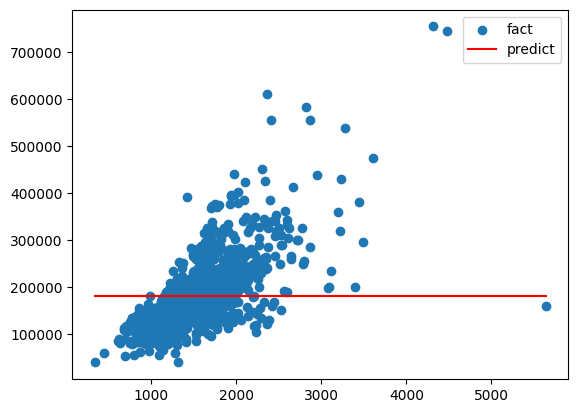

In [ ]:
plt.scatter(train['GrLivArea'], train[target_col], label='fact')
plt.plot(train['GrLivArea'], train['naive_predict'], label='predict', c='red')
plt.legend()
plt.show()

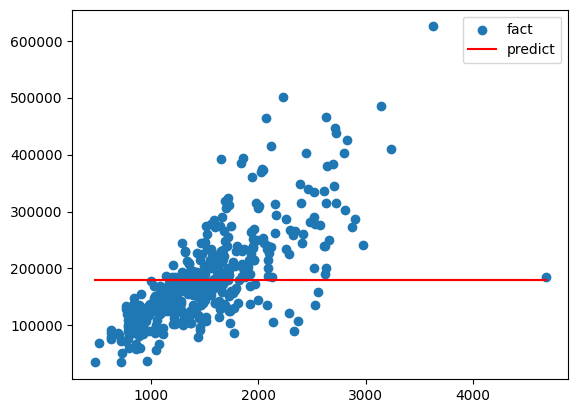

In [ ]:
plt.scatter(test['GrLivArea'], test[target_col], label='fact')
plt.plot(test['GrLivArea'], test['naive_predict'], label='predict', c='red')
plt.legend()
plt.show()

Попробуем отрисовать зависимость от другого фактора

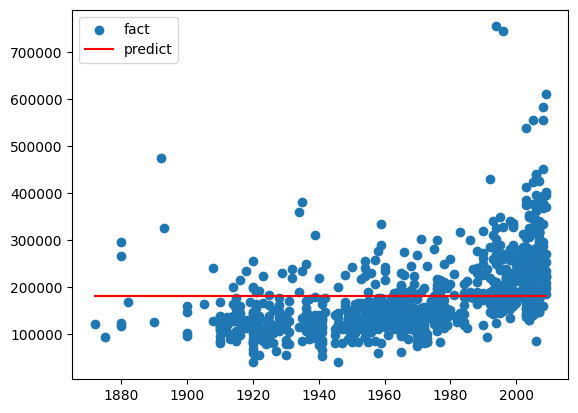

In [ ]:
plt.scatter(train['YearBuilt'], train[target_col], label='fact')
plt.plot(train['YearBuilt'], train['naive_predict'], label='predict', c='red')
plt.legend()
plt.show()

## Простая одномерная ручная регрессия

y = a*GrLivArea + b

In [ ]:
a = 117
b = 0

train['simple_predict'] = train['GrLivArea'] * a + b
test['simple_predict'] = test['GrLivArea'] * a + b

train_mse = mean_squared_error(train[target_col], train['simple_predict'])**0.5
test_mse = mean_squared_error(test[target_col], test['simple_predict'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

56525 56072 99.2%


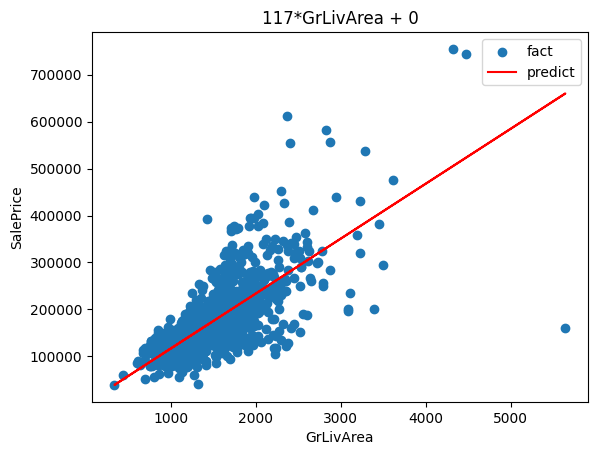

In [ ]:
plt.scatter(train['GrLivArea'], train[target_col], label='fact')
plt.plot(train['GrLivArea'], train['simple_predict'], label='predict', c='red')
plt.title(f'{a}*GrLivArea + {b}')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

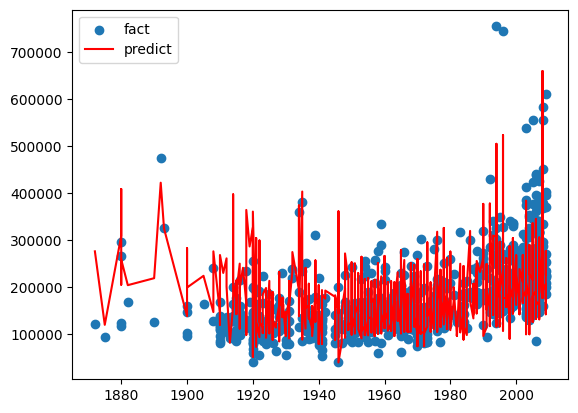

In [ ]:
plt.scatter(train['YearBuilt'], train[target_col], label='fact')
tmp = train[['YearBuilt', 'simple_predict']].sort_values('YearBuilt')
plt.plot(tmp['YearBuilt'], tmp['simple_predict'], label='predict', c='red')
plt.legend()
plt.show()

In [ ]:
train['year_5'] = train['YearBuilt'] // 5 * 5

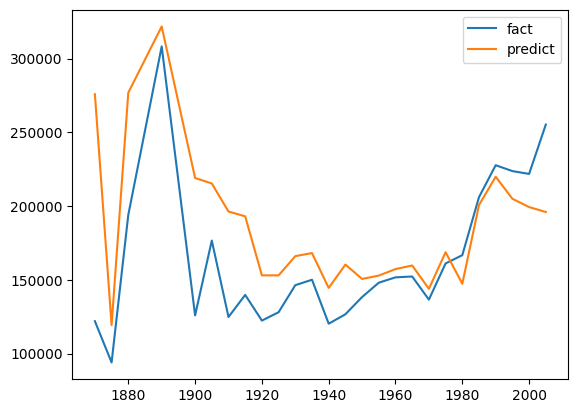

In [ ]:
agg = train.groupby('year_5', as_index=False)[['simple_predict', target_col]].mean()
plt.plot(agg['year_5'], agg[target_col], label='fact')
plt.plot(agg['year_5'], agg['simple_predict'], label='predict')
plt.legend()
plt.show()

<Axes: xlabel='year_5'>

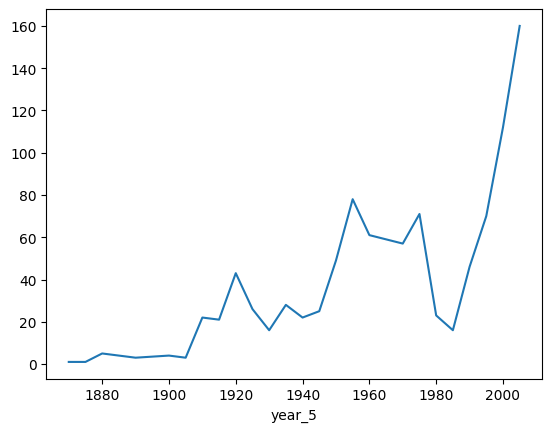

In [ ]:
train.groupby('year_5', as_index=True).size().plot()

## Одномерный метод наименьших квадратов

In [ ]:
def least_squared_estimator(X, y, learn_intercept=False):
  X = np.array(X)
  if learn_intercept:
    X = np.concatenate([np.ones((X.shape[0], 1), ), X ], axis=1)
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y
  return coefs

In [ ]:
least_squared_estimator(train[['GrLivArea']], train[target_col], True)

array([20148.93388376,   105.96148907])

In [ ]:
a = 105.96148907
b = 20148.93388376
train['simple_predict_v2'] = train['GrLivArea'] * a + b
test['simple_predict_v2'] = test['GrLivArea'] * a + b

train_mse = mean_squared_error(train[target_col], train['simple_predict_v2'])**0.5
test_mse = mean_squared_error(test[target_col], test['simple_predict_v2'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

56133 55816 99.43%


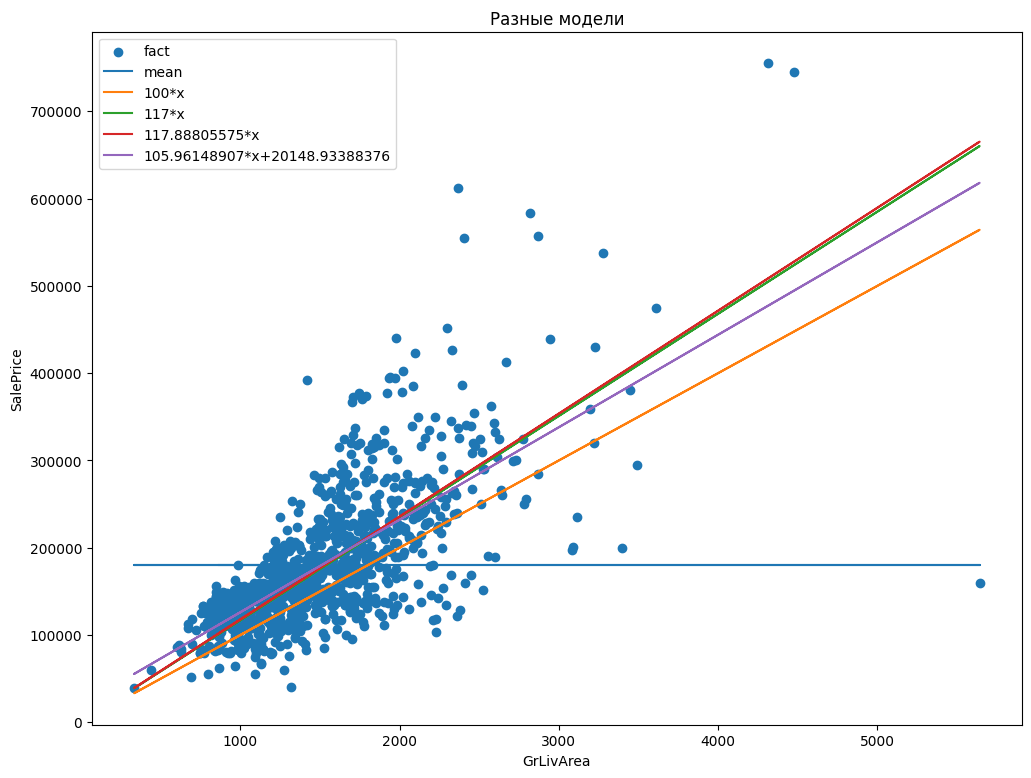

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(train['GrLivArea'], train[target_col], label='fact')
plt.plot(train['GrLivArea'], train['naive_predict'], label='mean',)
plt.plot(train['GrLivArea'], 100*train['GrLivArea'], label='100*x')
plt.plot(train['GrLivArea'], 117*train['GrLivArea'], label='117*x')
plt.plot(train['GrLivArea'], 117.88805575*train['GrLivArea'], label='117.88805575*x')
plt.plot(train['GrLivArea'], 105.96148907*train['GrLivArea']+20148.93388376, label='105.96148907*x+20148.93388376')
plt.title(f'Разные модели')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

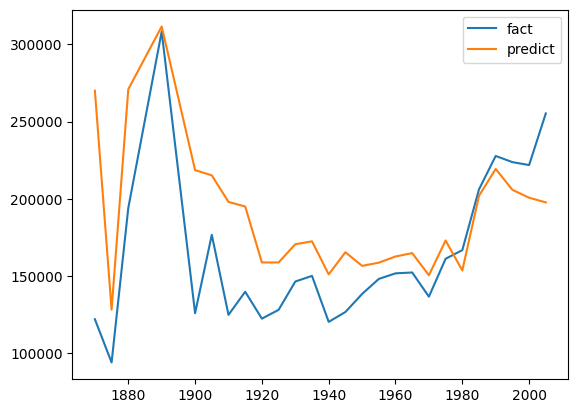

In [ ]:
agg = train.groupby('year_5', as_index=False)[['simple_predict_v2', target_col]].mean()
plt.plot(agg['year_5'], agg[target_col], label='fact')
plt.plot(agg['year_5'], agg['simple_predict_v2'], label='predict')
plt.legend()
plt.show()

## Многомерная Регрессия

## Коллиниарность

### Playground

In [ ]:
train['GrLivArea_twin'] = train['GrLivArea'] + np.random.rand(train.shape[0])
test['GrLivArea_twin'] = test['GrLivArea'] + np.random.rand(test.shape[0]) * 20

coefs = least_squared_estimator(train[['GrLivArea', 'GrLivArea_twin']], train[target_col], True)
coefs

array([16771.97870068, -6900.95020398,  7006.86880343])

In [ ]:
20 * 7006.86880343

140137.37606860002

In [ ]:
coefs[1] + coefs[2]

np.float64(105.91859944918815)

In [ ]:
a1 = coefs[1]
a2 = coefs[2]
b = coefs[0]

train['simple_predict_v3'] = train['GrLivArea'] * a1 + train['GrLivArea_twin'] * a2 + b
test['simple_predict_v3'] = test['GrLivArea'] * a1 + test['GrLivArea_twin'] * a2 +b

train_mse = mean_squared_error(train[target_col], train['simple_predict_v3'])**0.5
test_mse = mean_squared_error(test[target_col], test['simple_predict_v3'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

56095 93409 166.52%


In [ ]:
train['simple_predict_v3'].mean(), test['simple_predict_v3'].mean(), train['simple_predict_v3'].mean() - test['simple_predict_v3'].mean()

(np.float64(180580.43415436248),
 np.float64(247141.61997765678),
 np.float64(-66561.1858232943))

### Регуляризация

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1000000000000)
en = ElasticNet(alpha=200, l1_ratio=0.9)

lr.fit(train[['GrLivArea', 'GrLivArea_twin']], train[target_col])
lasso.fit(train[['GrLivArea', 'GrLivArea_twin']], train[target_col])
ridge.fit(train[['GrLivArea', 'GrLivArea_twin']], train[target_col])
en.fit(train[['GrLivArea', 'GrLivArea_twin']], train[target_col])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+12, tolerance: 6.267e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e+12, tolerance: 6.267e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=200, l1_ratio=0.9)

In [ ]:
lr.coef_, lr.intercept_

(array([-6900.9500618 ,  7006.86866103]), np.float64(16771.979389259097))

In [ ]:
lasso.coef_, lasso.intercept_

(array([103.66510542,   2.29866751]), np.float64(20144.3468536312))

In [ ]:
ridge.coef_, ridge.intercept_

(array([0.02873682, 0.02873762]), np.float64(180493.4008749596))

In [ ]:
en.coef_, en.intercept_

(array([96.42056098,  9.54176891]), np.float64(20142.973755207582))

## Категориальные

### Playground

<Axes: xlabel='Neighborhood'>

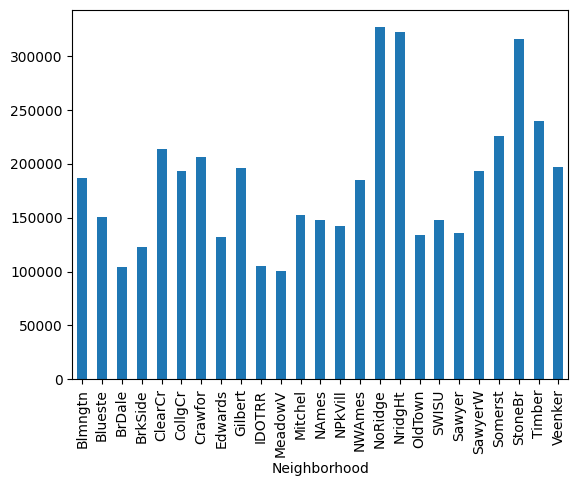

In [ ]:
train.groupby(['Neighborhood'])[target_col].mean().plot(kind='bar')

In [ ]:
cat_col = 'Neighborhood'

### OHE (One Hot Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

ohe.fit(train[[cat_col]])

OneHotEncoder()

In [ ]:
train_X = ohe.transform(train[[cat_col]])
test_X = ohe.transform(test[[cat_col]])

In [ ]:
display(train_X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1022 stored elements and shape (1022, 25)>

In [ ]:
display(train_X.todense().sum(axis=0))

matrix([[ 13.,   1.,  11.,  40.,  20., 100.,  37.,  75.,  62.,  28.,
           9.,  30., 158.,   9.,  47.,  27.,  55.,  79.,  18.,  57.,
          39.,  57.,  17.,  27.,   6.]])

In [ ]:
X_train_cat = train_X.todense()

In [ ]:
X_train_cat.shape

(1022, 25)

In [ ]:
X_train_new = np.concatenate([train[['GrLivArea']].values, X_train_cat ], axis=1)
X_train_new = X_train_cat

In [ ]:
# display(X_train_new)

In [ ]:
coefs = least_squared_estimator(X_train_new, train[target_col])
coefs

array([186386.61538462, 151000.        , 103990.90909091, 122647.5       ,
       213771.6       , 193079.85      , 206629.37837838, 131797.6       ,
       195629.69354839, 105602.71428571, 100600.        , 152867.86666667,
       147616.99367089, 142694.44444444, 184940.42553191, 326513.25925926,
       322309.67272727, 134225.74683544, 147491.66666667, 135654.24561404,
       193343.38461538, 225363.36842105, 315835.64705882, 239458.88888889,
       197333.33333333])

In [ ]:
train['preds_cat_v2'] = (X_train_new @ coefs).T

In [ ]:
# train['preds_cat'].value_counts()

In [ ]:
train.groupby(['Neighborhood'])[[target_col, 'simple_predict_v3', 'preds_cat', 'preds_cat_v2']].mean()

,SalePrice,simple_predict_v3,preds_cat,preds_cat_v2
Neighborhood,,,,
Blmngtn,186386.615385,168931.052668,186386.615385,186386.615385
Blueste,151000.000000,187799.825964,151000.000000,151000.000000
BrDale,103990.909091,142917.039905,103990.909091,103990.909091
BrkSide,122647.500000,146382.084659,122647.500000,122647.500000
ClearCr,213771.600000,203968.305679,213771.600000,213771.600000
CollgCr,193079.850000,173535.813498,193079.850000,193079.850000
Crawfor,206629.378378,206703.116967,206629.378378,206629.378378
Edwards,131797.600000,160443.086335,131797.600000,131797.600000
Gilbert,195629.693548,195124.939948,195629.693548,195629.693548


In [ ]:
326513.259259 / 103990.909091

3.13982503002523

In [ ]:
train_mse = mean_squared_error(train[target_col], train['preds_cat'])**0.5
print(round(train_mse))

40702


In [ ]:
train_mse = mean_squared_error(train[target_col], train['preds_cat_v2'])**0.5
print(round(train_mse))

53055


In [ ]:
train['preds_cat_v2'].nunique()

25

### Label Encoding

In [ ]:
cat_mapping = {}
for i, cat in enumerate(train[cat_col].unique()):
  cat_mapping[cat] = i

In [ ]:
cat_mapping

{'NAmes': 0,
 'Edwards': 1,
 'IDOTRR': 2,
 'CollgCr': 3,
 'NWAmes': 4,
 'BrkSide': 5,
 'Crawfor': 6,
 'Somerst': 7,
 'StoneBr': 8,
 'SWISU': 9,
 'NridgHt': 10,
 'NoRidge': 11,
 'SawyerW': 12,
 'ClearCr': 13,
 'Gilbert': 14,
 'Sawyer': 15,
 'Mitchel': 16,
 'OldTown': 17,
 'Blmngtn': 18,
 'Timber': 19,
 'NPkVill': 20,
 'Veenker': 21,
 'Blueste': 22,
 'BrDale': 23,
 'MeadowV': 24}

In [ ]:
train['cat_col'] = train[cat_col].apply(lambda x: cat_mapping[x])
test['cat_col'] = test[cat_col].apply(lambda x: cat_mapping[x])

In [ ]:
least_squared_estimator(train[['cat_col']], train[target_col], learn_intercept=False)

array([13662.98650975])

In [ ]:
train['cat_predict_le'] = 13662.98650975 * train['cat_col']
test['cat_predict_le'] = 13662.98650975 * test['cat_col']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['cat_predict_le'])**0.5
test_mse = mean_squared_error(test[target_col], test['cat_predict_le'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

133549 138157 103.45%


In [ ]:
cat_mapping = {}
for i, cat in enumerate(train.groupby([cat_col], as_index=False)[target_col].mean().sort_values(target_col)[cat_col]):
  cat_mapping[cat] = i

In [ ]:
cat_mapping

{'MeadowV': 0,
 'BrDale': 1,
 'IDOTRR': 2,
 'BrkSide': 3,
 'Edwards': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'NPkVill': 7,
 'SWISU': 8,
 'NAmes': 9,
 'Blueste': 10,
 'Mitchel': 11,
 'NWAmes': 12,
 'Blmngtn': 13,
 'CollgCr': 14,
 'SawyerW': 15,
 'Gilbert': 16,
 'Veenker': 17,
 'Crawfor': 18,
 'ClearCr': 19,
 'Somerst': 20,
 'Timber': 21,
 'StoneBr': 22,
 'NridgHt': 23,
 'NoRidge': 24}

In [ ]:
train['cat_col'] = train[cat_col].apply(lambda x: cat_mapping[x])
test['cat_col'] = test[cat_col].apply(lambda x: cat_mapping[x])

In [ ]:
least_squared_estimator(train[['cat_col']], train[target_col], learn_intercept=False)

array([13661.91506572])

In [ ]:
train['cat_predict_le'] = 13661.91506572 * train['cat_col']
test['cat_predict_le'] = 13661.91506572 * test['cat_col']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['cat_predict_le'])**0.5
test_mse = mean_squared_error(test[target_col], test['cat_predict_le'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

69650 67537 96.97%


### Mean Target Encoding

In [ ]:
cat_mapping = {}
for i, cat in train.groupby([cat_col], as_index=False)[target_col].mean().sort_values(target_col).iterrows():
  cat_mapping[cat[cat_col]] = cat[target_col]

In [ ]:
cat_mapping

{'MeadowV': 100600.0,
 'BrDale': 103990.90909090909,
 'IDOTRR': 105602.71428571429,
 'BrkSide': 122647.5,
 'Edwards': 131797.6,
 'OldTown': 134225.74683544305,
 'Sawyer': 135654.24561403508,
 'NPkVill': 142694.44444444444,
 'SWISU': 147491.66666666666,
 'NAmes': 147616.99367088606,
 'Blueste': 151000.0,
 'Mitchel': 152867.86666666667,
 'NWAmes': 184940.4255319149,
 'Blmngtn': 186386.61538461538,
 'CollgCr': 193079.85,
 'SawyerW': 193343.38461538462,
 'Gilbert': 195629.6935483871,
 'Veenker': 197333.33333333334,
 'Crawfor': 206629.37837837837,
 'ClearCr': 213771.6,
 'Somerst': 225363.36842105264,
 'Timber': 239458.88888888888,
 'StoneBr': 315835.64705882355,
 'NridgHt': 322309.67272727273,
 'NoRidge': 326513.25925925927}

In [ ]:
train['cat_col'] = train[cat_col].apply(lambda x: cat_mapping[x])
test['cat_col'] = test[cat_col].apply(lambda x: cat_mapping[x])

In [ ]:
least_squared_estimator(train[['cat_col']], train[target_col], learn_intercept=False)

array([1.])

In [ ]:
train['cat_predict_mte'] = 1 * train['cat_col']
test['cat_predict_mte'] = 1 * test['cat_col']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['cat_predict_mte'])**0.5
test_mse = mean_squared_error(test[target_col], test['cat_predict_mte'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

53055 55575 104.75%


In [ ]:
X_train_cat = train[['cat_col']]

In [ ]:
X_train_new = np.concatenate([train[['GrLivArea']].values, X_train_cat ], axis=1)

In [ ]:
coefs = least_squared_estimator(X_train_new, train[target_col], learn_intercept=False)
coefs

array([55.0267417 ,  0.56102902])

In [ ]:
train['predict_mte'] = X_train_new @ coefs

In [ ]:
train_mse = mean_squared_error(train[target_col], train['predict_mte'])**0.5
train_mse

44638.675126352064

In [ ]:
train.groupby(['Neighborhood'])[[target_col, 'simple_predict_v3', 'preds_cat', 'preds_cat_v2', 'predict_mte']].mean()

,SalePrice,simple_predict_v3,preds_cat,preds_cat_v2,predict_mte
Neighborhood,,,,,
Blmngtn,186386.615385,168931.052668,186386.615385,186386.615385,182282.990753
Blueste,151000.000000,187799.825964,151000.000000,151000.000000,170336.992101
BrDale,103990.909091,142917.039905,103990.909091,103990.909091,121897.804477
BrkSide,122647.500000,146382.084659,122647.500000,122647.500000,134472.217598
ClearCr,213771.600000,203968.305679,213771.600000,213771.600000,215150.345086
CollgCr,193079.850000,173535.813498,193079.850000,193079.850000,187929.485707
Crawfor,206629.378378,206703.116967,206629.378378,206629.378378,212757.270950
Edwards,131797.600000,160443.086335,131797.600000,131797.600000,146807.956032
Gilbert,195629.693548,195124.939948,195629.693548,195629.693548,200720.239505


## Пропуски в даннных

### Playground

In [ ]:
train['LotFrontage_isna'] = train['LotFrontage'].isna().astype(int)
test['LotFrontage_isna'] = test['LotFrontage'].isna().astype(int)
train.groupby(['LotFrontage_isna'])[target_col].mean()

,SalePrice
LotFrontage_isna,
0,181267.457346
1,177322.865169


In [ ]:
181267.457346 - 177322.865169

3944.592177000013

In [ ]:
train['LotFrontage_isna'].mean()

np.float64(0.17416829745596868)

In [ ]:
least_squared_estimator(train[['LotFrontage']], train[target_col])

array([nan])

In [ ]:
train['LotFrontage'].mean()

np.float64(70.37322274881517)

In [ ]:
test['LotFrontage'].mean()

np.float64(69.28571428571429)

In [ ]:
train['LotFrontage_filled'] = train['LotFrontage'].fillna(70.37322274881517)
test['LotFrontage_filled'] = test['LotFrontage'].fillna(70.37322274881517)

In [ ]:
least_squared_estimator(train[['LotFrontage_filled']], train[target_col], learn_intercept=True)

array([99027.90172795,  1158.85743936])

In [ ]:
train['nan_predicts'] = 99027.90172795 + 1158.85743936 * train['LotFrontage_filled']
test['nan_predicts'] = 99027.90172795 + 1158.85743936 * test['LotFrontage_filled']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['nan_predicts'])**0.5
test_mse = mean_squared_error(test[target_col], test['nan_predicts'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

73751 77319 104.84%


In [ ]:
least_squared_estimator(train[['LotFrontage_filled', 'LotFrontage_isna']], train[target_col], learn_intercept=True)

array([99714.92463165,  1158.85743936, -3944.59217743])

In [ ]:
train['nan_predicts_v2'] = 99714.92463165 + 1158.85743936 * train['LotFrontage_filled'] - 3944.59217743 * train['LotFrontage_isna']
test['nan_predicts_v2'] = 99714.92463165 + 1158.85743936 * test['LotFrontage_filled'] - 3944.59217743 * test['LotFrontage_isna']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['nan_predicts_v2'])**0.5
test_mse = mean_squared_error(test[target_col], test['nan_predicts_v2'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

73736 77414 104.99%


## Скейлинг

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = train[['LotFrontage_filled', 'LotArea']]
X_test = test[['LotFrontage_filled', 'LotArea']]

In [ ]:
least_squared_estimator(X_train, train[target_col], learn_intercept=True)

array([9.64366665e+04, 9.91784600e+02, 1.37929158e+00])

In [ ]:
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
display(X_train_scaled)

array([[-0.0164329 , -0.13970768],
       [ 0.20371584, -0.06196966],
       [ 0.42386459, -0.19911024],
       ...,
       [ 3.06564958,  0.93661531],
       [-0.1925519 , -0.17852307],
       [ 0.64401334,  0.07506369]])

In [ ]:
least_squared_estimator(X_train_scaled, train[target_col], learn_intercept=True)

array([180580.43444227,  22525.3289786 ,  12863.54475894])

## Полиномиальная регрессия

In [ ]:
xs = np.linspace(-50, 50, 1000)
ys = xs**2 * (1 + np.random.rand(xs.shape[0]) / 5 - 0.1)

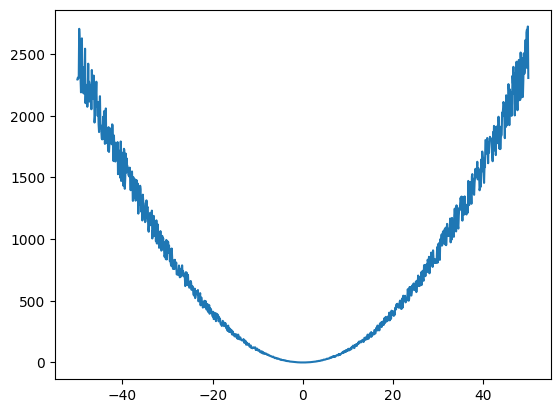

In [ ]:
plt.plot(xs, ys)

In [ ]:
least_squared_estimator(xs.reshape(-1, 1), ys, learn_intercept=True)

array([8.34771268e+02, 1.84736237e-01])

In [ ]:
preds = xs* 6.27497634e-02 + 8.32747634e+02

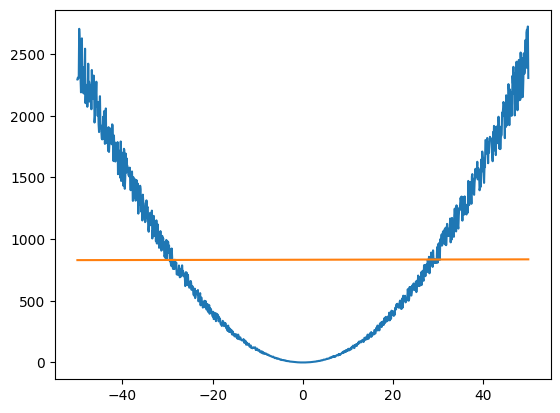

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, preds)

In [ ]:
least_squared_estimator(xs.reshape(-1, 1)**2, ys, learn_intercept=True)

array([2.53926302, 0.99668304])

In [ ]:
preds = xs**2*0.99994969 - 2.21202444

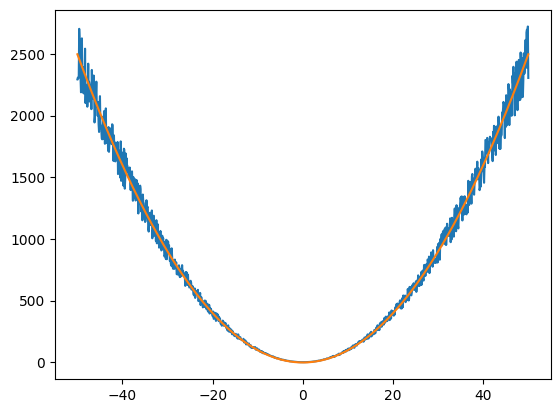

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, preds)

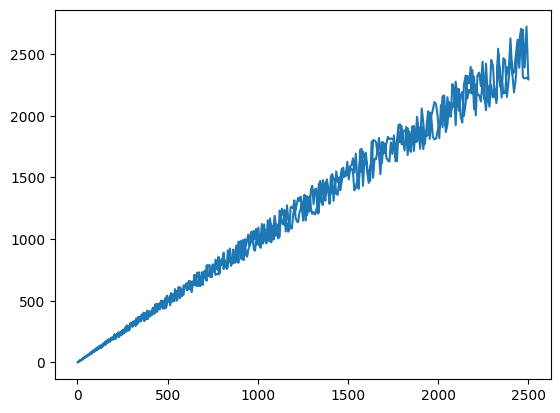

In [ ]:
plt.plot(xs**2, ys)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly.fit(xs.reshape(-1, 1))

xs_transformed = poly.transform(xs.reshape(-1, 1))
display(xs_transformed)

array([[-5.00000000e+01,  2.50000000e+03, -1.25000000e+05],
       [-4.98998999e+01,  2.49000001e+03, -1.24250751e+05],
       [-4.97997998e+01,  2.48002006e+03, -1.23504502e+05],
       ...,
       [ 4.97997998e+01,  2.48002006e+03,  1.23504502e+05],
       [ 4.98998999e+01,  2.49000001e+03,  1.24250751e+05],
       [ 5.00000000e+01,  2.50000000e+03,  1.25000000e+05]])

In [ ]:
least_squared_estimator(xs_transformed, ys, learn_intercept=True)

array([ 2.53926302e+00, -1.97739778e-01,  9.96683045e-01,  2.54474891e-04])

In [ ]:
preds = -1.06750674 + xs_transformed[:, 0] * (-0.02106509) + xs_transformed[:, 1] * 1.00686099

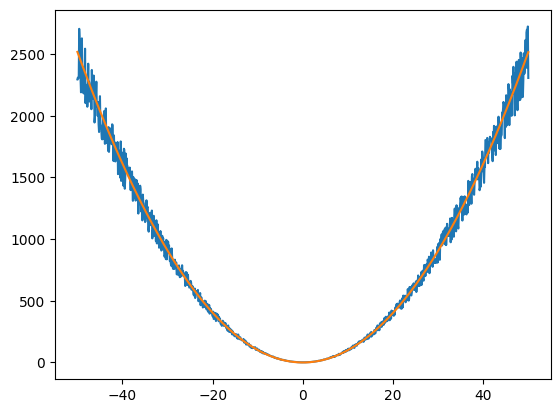

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, preds)

# Домашнее Задание

### Моделирование
Обучить модель линейной регресии на всех фичах (категориальных+числовых).
Предварительно преобразовать категориальные фичи, заполнить пропуски, почистить высокоскореллированные фичи и тд.

Попробовать обучить lasso/ridge регрессии, оценить коэффициенты при регрессорах, описать есть ли ненужные фичи.

Замерить метрики MSE, R2 на train/test выборках

Со **здвёздочкой***: Дополнительно отобрать фичи таким образом, чтобы максимизировать качество модели на test выборке.

In [1]:
!gdown 1RtXyuP27pffnvyvKNT6kT8_4KnniShvN

Downloading...
From: https://drive.google.com/uc?id=1RtXyuP27pffnvyvKNT6kT8_4KnniShvN
To: /content/house_prices.csv
100% 461k/461k [00:00<00:00, 10.4MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [16]:
df = pd.read_csv('./house_prices.csv', index_col='Id')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SalePrice'), df['SalePrice'], test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,Con,Normal
933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal


In [ ]:
X_train.shape

(1022, 79)

In [5]:
X_train.select_dtypes(include=np.number).columns[X_train.select_dtypes(include=np.number).isna().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [ ]:
X_train.isna().sum()[X_train.isna().sum() > 0].sort_values() / X_train.shape[0]

,0
Electrical,0.000978
MasVnrArea,0.002935
BsmtCond,0.025440
BsmtExposure,0.025440
BsmtFinType1,0.025440
BsmtQual,0.025440
BsmtFinType2,0.025440
GarageType,0.052838
GarageQual,0.052838
GarageFinish,0.052838


In [6]:
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

In [18]:
X_train = X_train.drop(columns=drop_cols)
X_test = X_test.drop(columns=drop_cols)

Заполним пропуски в категориальных фичах модой

In [19]:
cat_na = X_train.select_dtypes(include='object').columns[X_train.select_dtypes(include='object').isna().any()]
for col in cat_na:
  X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
  X_test[col] = X_test[col].fillna(X_train[col].mode()[0])


Заполним пропуски в числовых фичах

In [20]:
num_na = X_train.select_dtypes(include=np.number).columns[X_train.select_dtypes(include=np.number).isna().any()]
for col in num_na:
  X_train[col] = X_train[col].fillna(X_train[col].mean())
  X_test[col] = X_test[col].fillna(X_train[col].mean())



In [21]:
num_cols = X_train.select_dtypes(include=np.number).columns

In [11]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

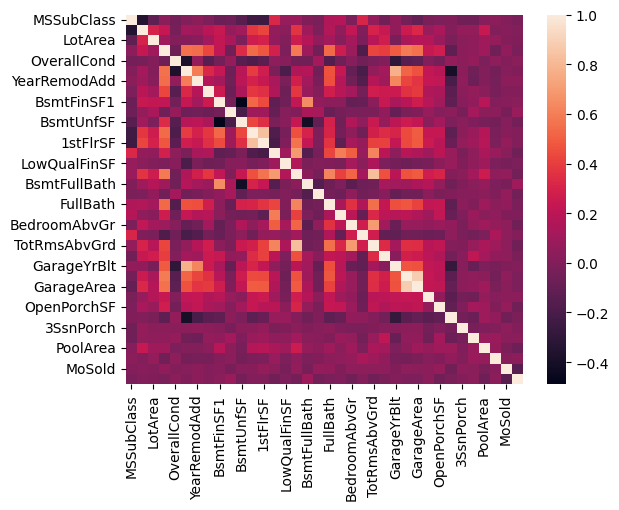

In [ ]:
sns.heatmap(X_train[num_cols].corr())
plt.show()

In [22]:
corr_features = ['GarageArea', 'BsmtUnfSF', 'MSSubClass', 'YearBuilt']

In [23]:
X_train = X_train.drop(columns=corr_features)
X_test = X_test.drop(columns=corr_features)

In [14]:
X_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
num_features = X_train.select_dtypes(include=np.number).columns
#X_train = X_train.drop(columns=['SaleType'])

#X_test = X_test.drop(columns=['SaleType'])
cat_features = X_train.select_dtypes(include='object').columns


In [25]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train[cat_features])

X_train_cat_ohe = ohe.transform(X_train[cat_features]).toarray()
X_test_cat_ohe = ohe.transform(X_test[cat_features]).toarray()

scaler = StandardScaler()
scaler.fit(X_train[num_features])

X_train_num = scaler.transform(X_train[num_features])
X_test_num = scaler.transform(X_test[num_features])

X_train_prep = np.concatenate([X_train_num, X_train_cat_ohe], axis=1)
X_test_prep = np.concatenate([X_test_num, X_test_cat_ohe], axis=1)

In [29]:
lasso = Lasso(alpha=10)
lasso.fit(X_train_prep, y_train)

pred = lasso.predict(X_test_prep)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 681557637.2079526
R2: 0.902328965394095


In [34]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_prep, y_train)

pred = ridge.predict(X_test_prep)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 752008800.9515058
R2: 0.8922329182274731


In [35]:
lasso.get_params()

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [41]:
sorted(np.abs(lasso.coef_), reverse=True)

[np.float64(589371.1291451213),
 np.float64(205126.6081244627),
 np.float64(119543.86563205704),
 np.float64(102061.49890583445),
 np.float64(44521.663880041015),
 np.float64(37081.30397021913),
 np.float64(36739.09352810285),
 np.float64(36647.161751712374),
 np.float64(29524.50889151814),
 np.float64(26707.068783715808),
 np.float64(23225.698924868866),
 np.float64(22184.42864929427),
 np.float64(21219.386421022507),
 np.float64(20714.174700928143),
 np.float64(20441.182443853806),
 np.float64(19874.6699817553),
 np.float64(17593.64606907712),
 np.float64(17507.99555984553),
 np.float64(17193.000868776388),
 np.float64(17122.473663624583),
 np.float64(16535.476068299693),
 np.float64(16109.760162063196),
 np.float64(15879.633605755122),
 np.float64(15707.258410578885),
 np.float64(15626.256836566607),
 np.float64(15022.529288223037),
 np.float64(13943.810023319691),
 np.float64(13893.846674170956),
 np.float64(13366.474249486684),
 np.float64(13194.606787306448),
 np.float64(13126.12

Очень много больших коэффициентов. Даже при похожих значениях X, y будет сильно различаться => модель не подходит для реального использования

In [40]:
sorted(np.abs(ridge.coef_), reverse=True)

[np.float64(529714.3984135604),
 np.float64(177403.67294221435),
 np.float64(132525.83300457208),
 np.float64(120432.43226062799),
 np.float64(115043.74958636866),
 np.float64(91529.2243473579),
 np.float64(85248.38570135871),
 np.float64(81323.24512444896),
 np.float64(79904.0710643229),
 np.float64(76665.72259055091),
 np.float64(57951.362120625556),
 np.float64(54654.821800180056),
 np.float64(50271.64809669512),
 np.float64(49252.34708357),
 np.float64(43442.21646802785),
 np.float64(41611.53174535192),
 np.float64(41109.596563236526),
 np.float64(40095.894998943055),
 np.float64(39547.63865213912),
 np.float64(38553.19864852307),
 np.float64(32115.43243939957),
 np.float64(30736.96522284097),
 np.float64(28729.770719564578),
 np.float64(27021.817470544316),
 np.float64(26895.27153186939),
 np.float64(25803.47837192083),
 np.float64(25803.28817035106),
 np.float64(25424.07102977588),
 np.float64(24483.717779106388),
 np.float64(24161.60967118113),
 np.float64(22647.12571570306),
 n

Очень много больших коэффициентов. Даже при похожих значениях X, y будет сильно различаться => модель не подходит для реального использования